In [1]:
import torch
import numpy as np
from torch import nn
from torch import optim

from sklearn.datasets import load_diabetes
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the dataset
X = load_diabetes()['data']
y = load_diabetes()['target']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=23)

In [3]:
type(X_train)

numpy.ndarray

y = 3x^2 + 5x + 6 where x = 2

In [4]:
x = torch.tensor(data = 2.0, requires_grad=True)

y = 3 * x ** 2 + 5 * x + 6

y.backward()

print(f'The derivative of y with respect to x at x = 2 is {x.grad}')

The derivative of y with respect to x at x = 2 is 17.0


In [5]:
# convert all the data to tensor

X_train_tensor = torch.tensor(data = X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(data = X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(data = y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(data = y_test, dtype=torch.float32)

type(X_train_tensor)

torch.Tensor

In [7]:
# convert the ys columnwise

y_train_tensor = y_train_tensor.unsqueeze(1)
y_test_tensor = y_test_tensor.unsqueeze(1)

In [19]:
# create the graph

class Diabetes(nn.Module):

  def __init__(self, input_dim: int) -> None:
    super().__init__()
    self.fc1 = nn.Linear(in_features=input_dim, out_features=500)
    self.fc2 = nn.Linear(in_features=500, out_features= 250)
    self.out = nn.Linear(in_features=250, out_features= 1)
    self.relu = nn.ReLU()

  def forward(self, X: torch.tensor):

    result = self.relu(self.fc1(X))
    result = self.relu(self.fc2(result))
    result = self.out(result)

    return result

In [20]:
# init the model and hyperparameters

model = Diabetes(input_dim = X_train.shape[1]) # init the model
optimizer = optim.Adam(params = model.parameters(), lr = 1e-4)
EPOCHS = 5000
criterion = nn.MSELoss()

In [21]:
# begin the training loop

loss_tracker = []
model.train() # model in train mode

for epoch in range(EPOCHS):
  # forward pass
  train_preds = model(X_train_tensor)
  loss = criterion(train_preds, y_train_tensor)

  # back propragaation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  loss_tracker.append(loss.item())

  if epoch % 1000 == 0:
    print(f'Epoch: {(epoch // 1000) + 1}.........Loss: {loss.item()}')

Epoch: 1.........Loss: 27676.986328125
Epoch: 2.........Loss: 4297.95556640625
Epoch: 3.........Loss: 3478.423828125
Epoch: 4.........Loss: 3079.1220703125
Epoch: 5.........Loss: 2891.636474609375


In [26]:
# inference on the test set

model.eval()
with torch.no_grad():
  test_preds = model(X_test_tensor)
  test_preds = test_preds.squeeze()


print(f'test_rmse: {root_mean_squared_error(y_test, test_preds)}')

test_rmse: 56.56563091660001


Text(0, 0.5, 'Loss')

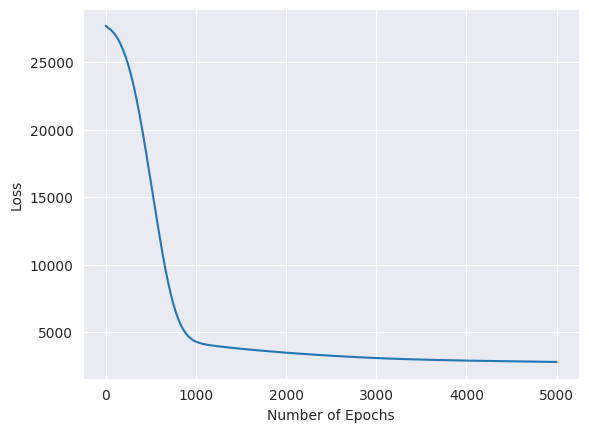

In [23]:
sns.set_style('darkgrid')


plt.plot(list(range(5000)), loss_tracker)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')